1. Draw a histogram showing the popularity of the main hashtags highlighting the number of tweets per individual hashtag and in another graph the number of distinct Tweet users per individual hashtag.

In [60]:
import pandas as pd
import ast

hashtags = ['ukrainewar', 'war', 'army', 'military', 'kiev', 'ua', 'specialforces', 'donbass', 'donbasswar', 'airsoft', 'nomockal', 'warukraine', 'tactics', 'azovsea', 'militarystile', 'azov', 'russia', 'donetsk', 'soldiers', 'ukrainenews', 'odessa', 'ukrainianarmy', 'lviv', 'victory', 'nato', 'kyiv', 'militaryukraine', 'news']
tweets = pd.read_csv('tweets_2022-05-08.csv')

dictOfhashtags = { i : 0 for i in hashtags }

for index, row in tweets.iterrows():
    for hashtag in ast.literal_eval(row.loc['hashtags']):
        if hashtag.lower() in dictOfhashtags:
            dictOfhashtags[hashtag.lower()] += 1

In [83]:
print(tweets.head())

   Unnamed: 0                   id              user_id        username  \
0           0  1523392453822189568            203332110   worldbankdata   
1           2  1523392450831679490  1518487138672648192  The_Architetto   
2           4  1523392449195896833           1020285253     VanguardMag   
3           8  1523392448331800577  1121471431873847299   ReviewingNews   
4          15  1523392446155333633             27688552       JPeterUNI   

          location geoid                                               text  \
0              NaN   NaN  #DYK that after food prices, energy prices are...   
1              NaN   NaN  I’m new to this and constantly learning every ...   
2  Ottawa, Ontario   NaN  How does the military attract digital natives?...   
3    United States   NaN  One in four small businesses still negatively ...   
4              NaN   NaN  Kentucky patriotic map. Vector graphic design ...   

  language                       date  \
0       en  2022-05-08 20:00:38+0

In [61]:
print(dictOfhashtags)

{'ukrainewar': 871, 'war': 881, 'army': 637, 'military': 267, 'kiev': 592, 'ua': 98, 'specialforces': 5, 'donbass': 335, 'donbasswar': 6, 'airsoft': 45, 'nomockal': 0, 'warukraine': 27, 'tactics': 13, 'azovsea': 1, 'militarystile': 0, 'azov': 823, 'russia': 4924, 'donetsk': 118, 'soldiers': 25, 'ukrainenews': 64, 'odessa': 297, 'ukrainianarmy': 52, 'lviv': 89, 'victory': 62, 'nato': 1641, 'kyiv': 870, 'militaryukraine': 0, 'news': 9599}


In [62]:
import matplotlib as mpl
from matplotlib import pyplot as plt


<ipython-input-63-693503216f64>:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



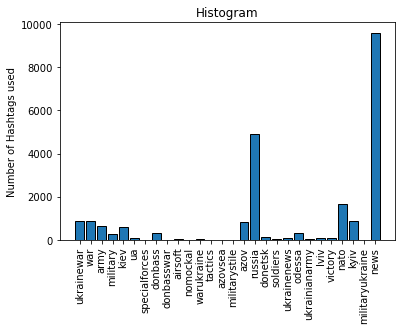

In [63]:



plt.bar(range(len(dictOfhashtags.keys())), dictOfhashtags.values(), edgecolor = 'black')


plt.title("Histogram")
plt.ylabel("Number of Hashtags used")

ax = plt.subplot()

ax.tick_params(axis = 'x', labelrotation = 90)
plt.xticks(range(len(dictOfhashtags.keys())), dictOfhashtags.keys())

plt.show()

In [64]:
dictOfhashtags = { i : [] for i in hashtags }

for index, row in tweets.iterrows():
    for hashtag in ast.literal_eval(row.loc['hashtags']):
        if hashtag.lower() in dictOfhashtags:
            if row.loc['username'] not in dictOfhashtags[hashtag.lower()]:
                dictOfhashtags[hashtag.lower()].append(row.loc['username'])

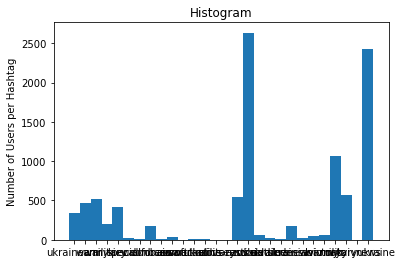

In [65]:
plt.bar(range(len(dictOfhashtags.keys())), [len(x) for x in dictOfhashtags.values()], 1)


plt.title("Histogram")
plt.ylabel("Number of Users per Hashtag")


plt.xticks(range(len(dictOfhashtags.keys())), dictOfhashtags.keys())

plt.show()

2. Draw pie chart illustrations showing regional location of the tweets associated to each of the above main hashtags using the location attribute of the tweet (whenever available).

In [98]:
from geopy.geocoders import Nominatim

def whereIs(s):

    geolocator = Nominatim(user_agent="WarTwitterAnalysis")
    location = geolocator.geocode(s, timeout=10)
    if location is None :
        return None
    return location.address



dictOfhashtags_location = { i : {} for i in hashtags }


for index, row in tweets.iterrows():
    for hashtag in ast.literal_eval(row.loc['hashtags']):
        if hashtag.lower() in dictOfhashtags_location:
            loc_string = row.loc['location']
            if type(loc_string) != type(0.1) : #check if the string is not nan(not a number)
                loc = whereIs(loc_string)
                if loc is not None : 
                    region = loc.rsplit(',', 1)[-1] 
                    if region[0] == ' ' :
                        region = region[1:]
                    #if region not in dictOfhashtags_location[hashtag.lower()]:

                        if region not in dictOfhashtags_location[hashtag.lower()].keys():
                            #dictOfhashtags_location[hashtag.lower()].append(region)
                            dictOfhashtags_location[hashtag.lower()][region] = 1
                        else:
                            dictOfhashtags_location[hashtag.lower()][region] += 1
                            
                        #dictOfhashtags_location[hashtag.lower()].append(region)
                        print(loc)
                        print(region)




Ottawa, (Old) Ottawa, Ottawa, Eastern Ontario, Ontario, K1S 3W7, Canada
Canada
New York, United States
United States
Hamburg, Deutschland
Deutschland
Keene, Cheshire County, New Hampshire, United States
United States
Nordrhein-Westfalen, Deutschland
Deutschland
Las Vegas, Clark County, Nevada, United States
United States
Cathedral Church of Christ and the Blessed Virgin Mary, Bell Tower Walk, Newtown, City of Chester, Chester, Cheshire West and Chester, North West England, England, CH1 2DY, United Kingdom
United Kingdom
Nordrhein-Westfalen, Deutschland
Deutschland
Las Vegas, Clark County, Nevada, United States
United States
Las Vegas, Clark County, Nevada, United States
United States
1/10 Road, Mesa County, Colorado, United States
United States
Warszawa, województwo mazowieckie, Polska
Polska
1/10 Road, Mesa County, Colorado, United States
United States
1/10 Road, Mesa County, Colorado, United States
United States
1/10 Road, Mesa County, Colorado, United States
United States
1/10 Road,

In [99]:
print(index)

19992


In [100]:
print(dictOfhashtags_location)

{'ukrainewar': {'India': 29, 'France': 9, 'España': 10, 'Deutschland': 40, 'Nederland': 2, 'United States': 51, '日本': 5, 'Ecuador': 1, 'Sverige': 2, 'Україна': 27, 'ישראל': 13, 'Polska': 2, 'پاکستان': 1, 'Österreich': 2, 'United Kingdom': 8, 'Schweiz/Suisse/Svizzera/Svizra': 5, 'Pilipinas / Philippines': 2, 'Italia': 6, 'Madagasikara': 1, '中国': 2, 'Suomi / Finland': 4, 'Danmark': 1, 'België / Belgique / Belgien': 1, 'Canada': 6, 'Србија': 1, 'República Dominicana': 1, 'Australia': 3, 'Sierra Leone': 1, 'Бългaрия': 1, 'Portugal': 1, 'Indonesia': 2, 'Paraguay': 1, 'South Africa': 2, 'România': 1, 'ประเทศไทย': 2, 'বাংলাদেশ': 1}, 'war': {'United States': 72, 'Polska': 12, 'Україна': 23, 'Portugal': 2, 'Canada': 20, 'United Kingdom': 22, 'Schweiz/Suisse/Svizzera/Svizra': 1, 'Slovensko': 1, 'España': 16, 'France': 11, 'România': 3, 'ایران': 1, 'Azərbaycan': 2, 'Norge': 1, 'Italia': 15, 'မြန်မာ': 1, 'Deutschland': 25, 'Ελλάς': 2, 'Ayiti': 14, 'Sverige': 3, 'South Africa': 2, 'Brasil': 6, 'Ind

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 26085 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 26412 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 20013 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 22269 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 3611 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeW

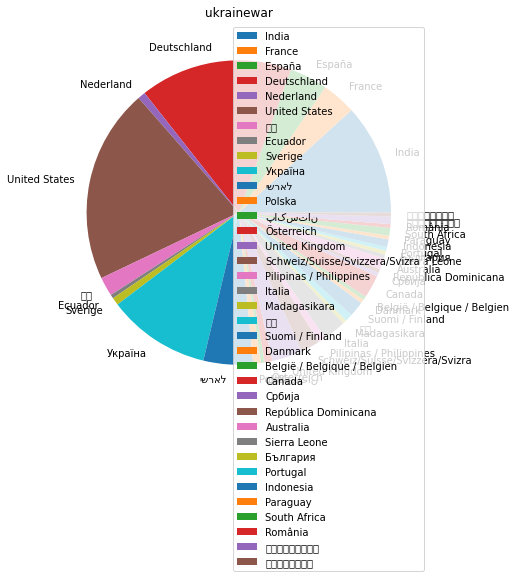

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 4121 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 4156 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 4116 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 4154 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 4140 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarni

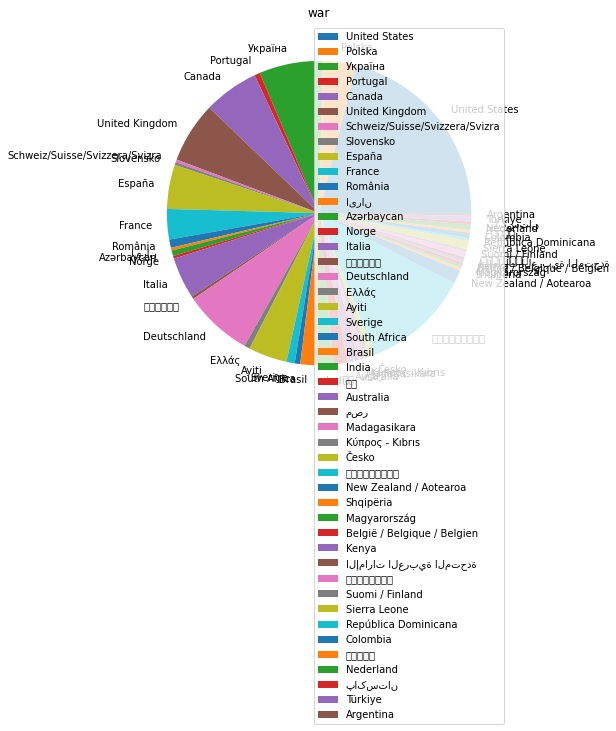

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 33274 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 28771 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45824 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 54620 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 48124 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: Runtime

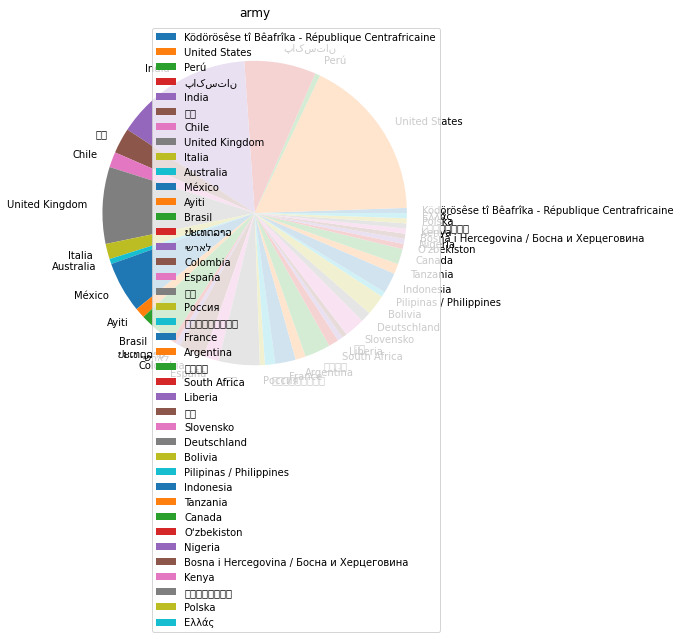

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 6190 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 6180 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 6185 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 6189 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 6191 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarni

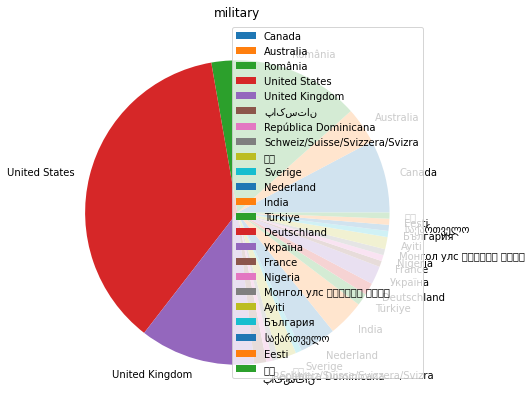

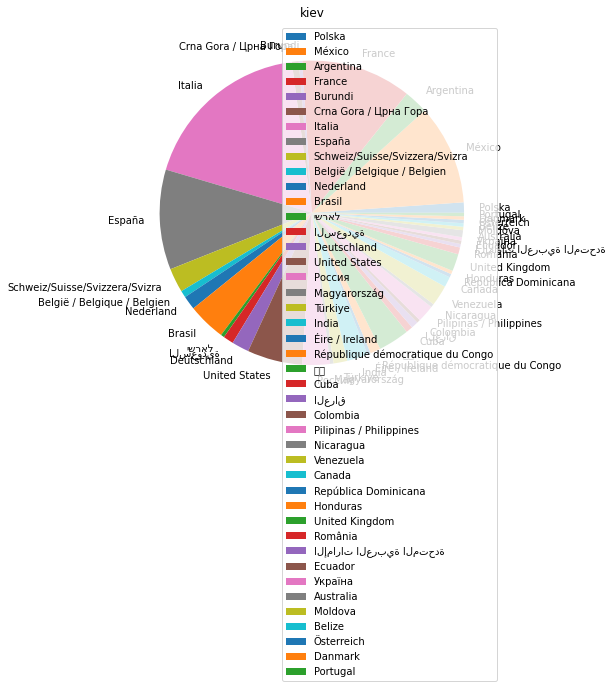

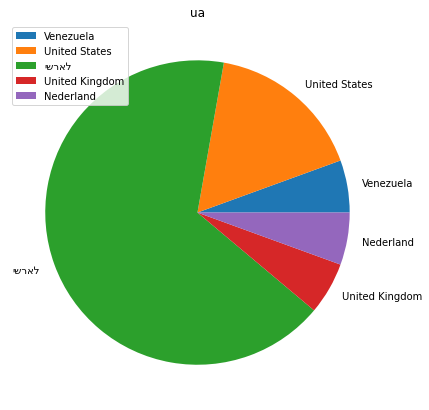

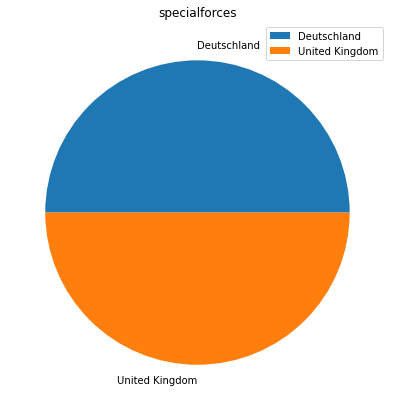

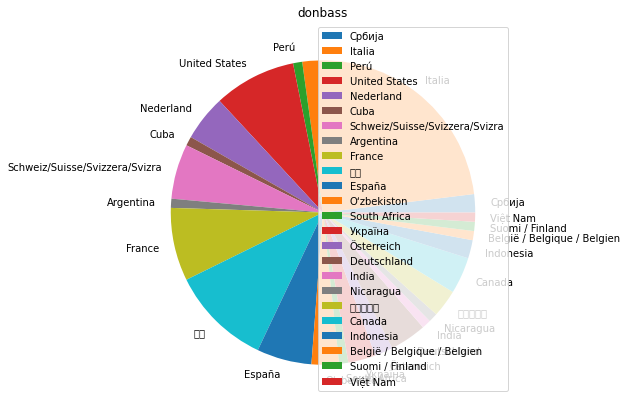

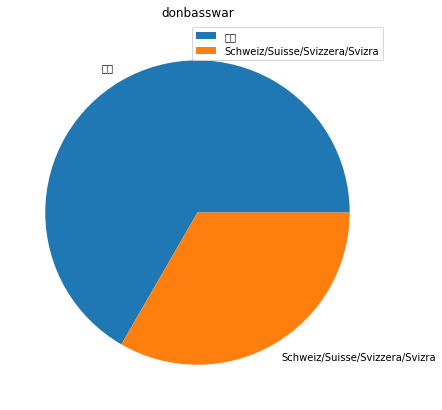

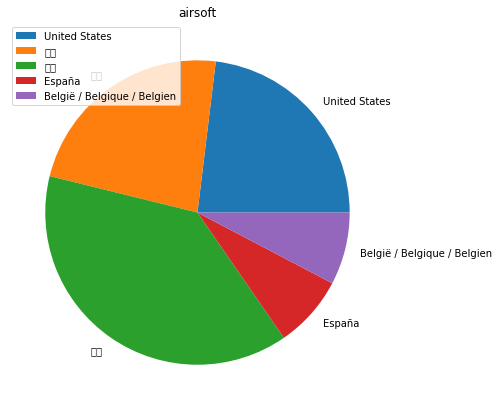

No handles with labels found to put in legend.


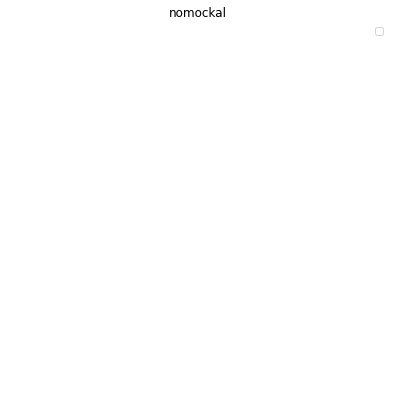

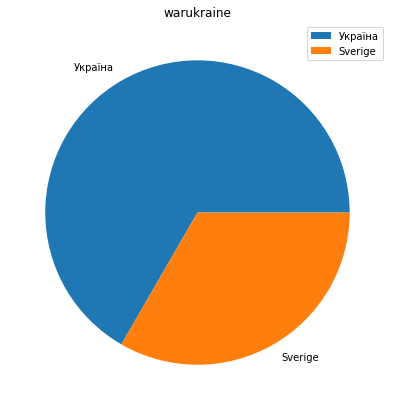

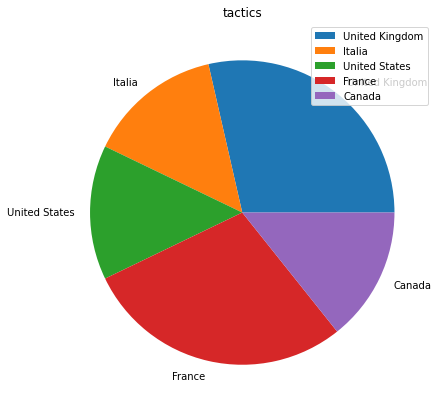

No handles with labels found to put in legend.


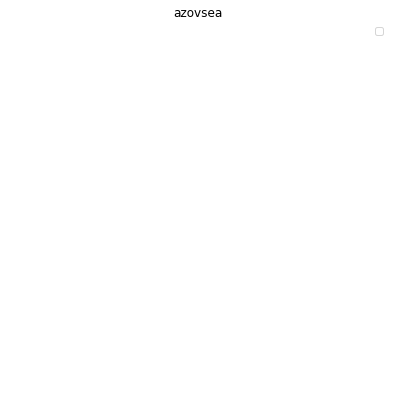

No handles with labels found to put in legend.


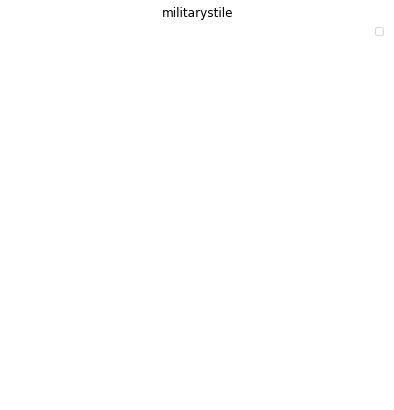

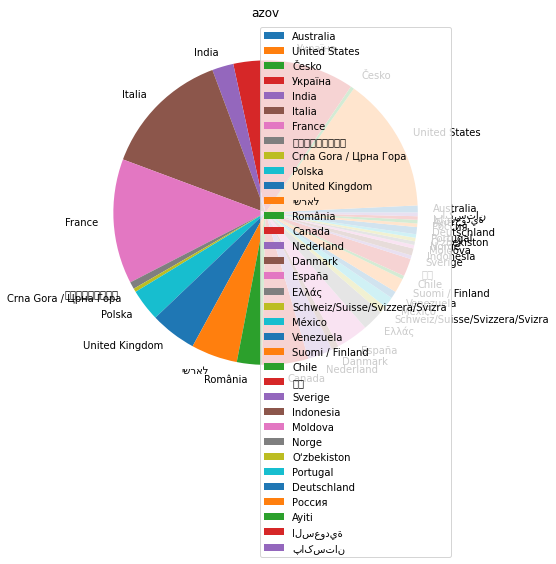

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 1931 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 1960 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 1928 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 1964 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 1920 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarni

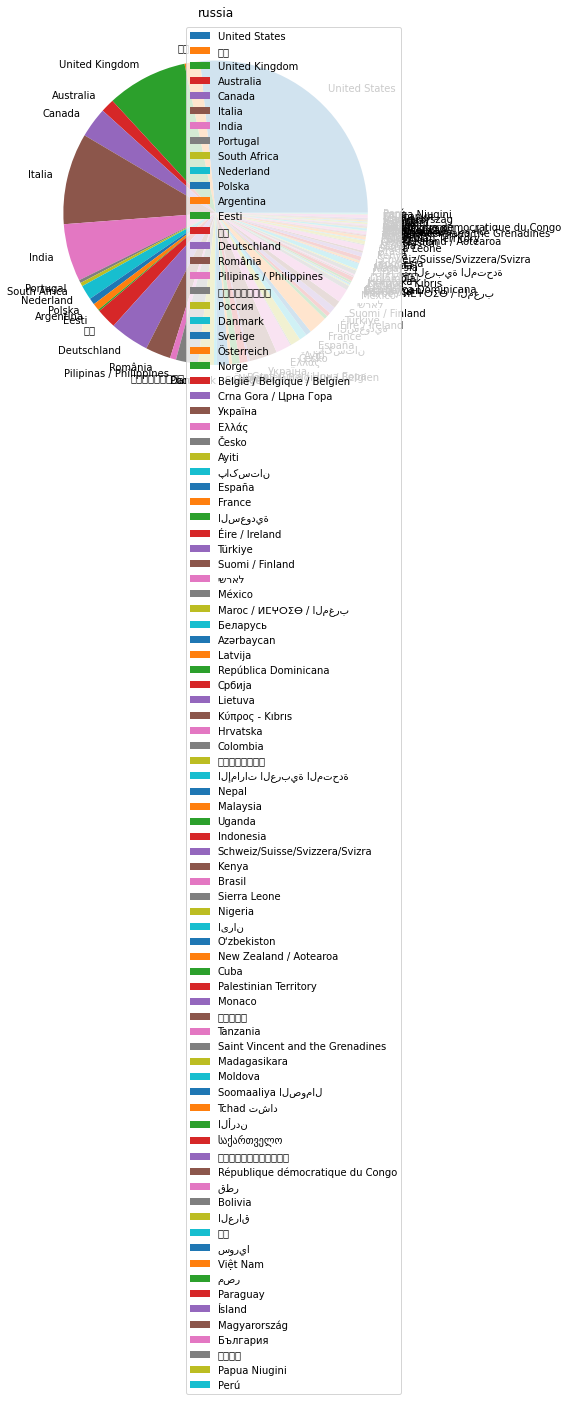

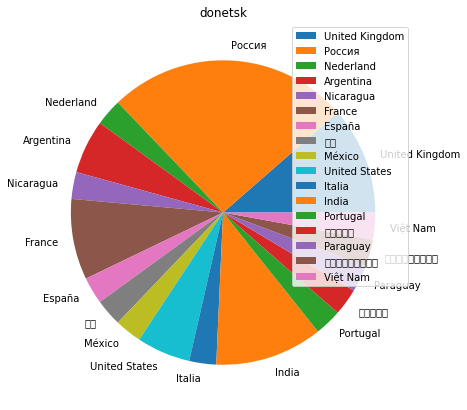

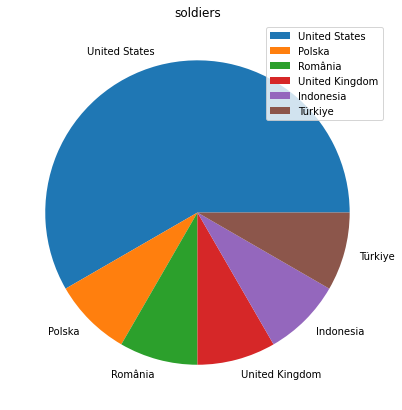

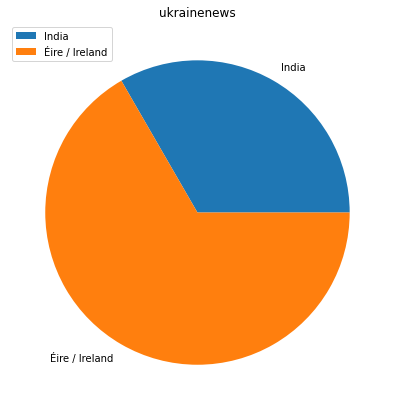

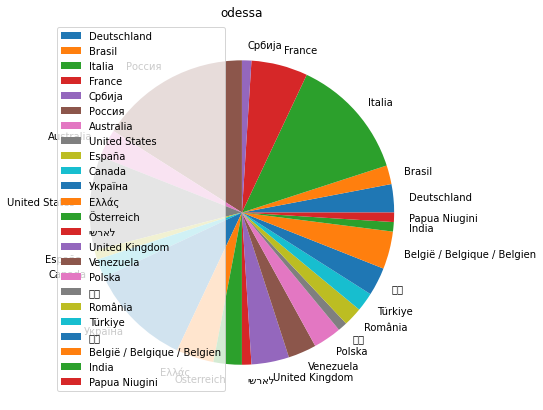

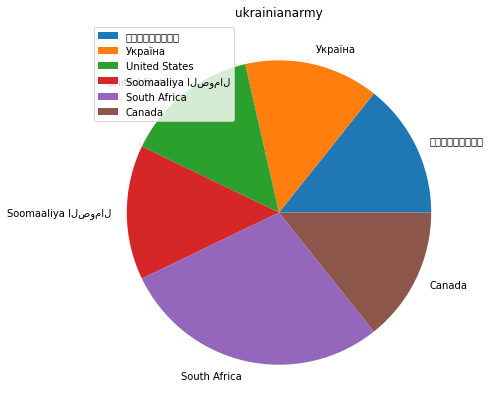

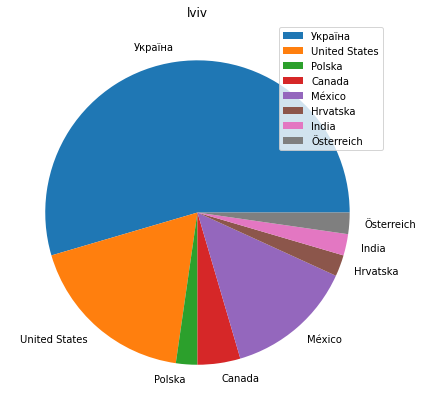

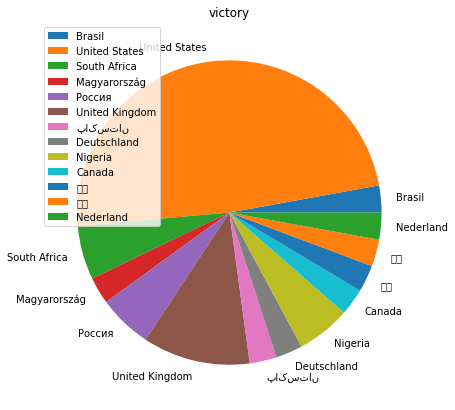

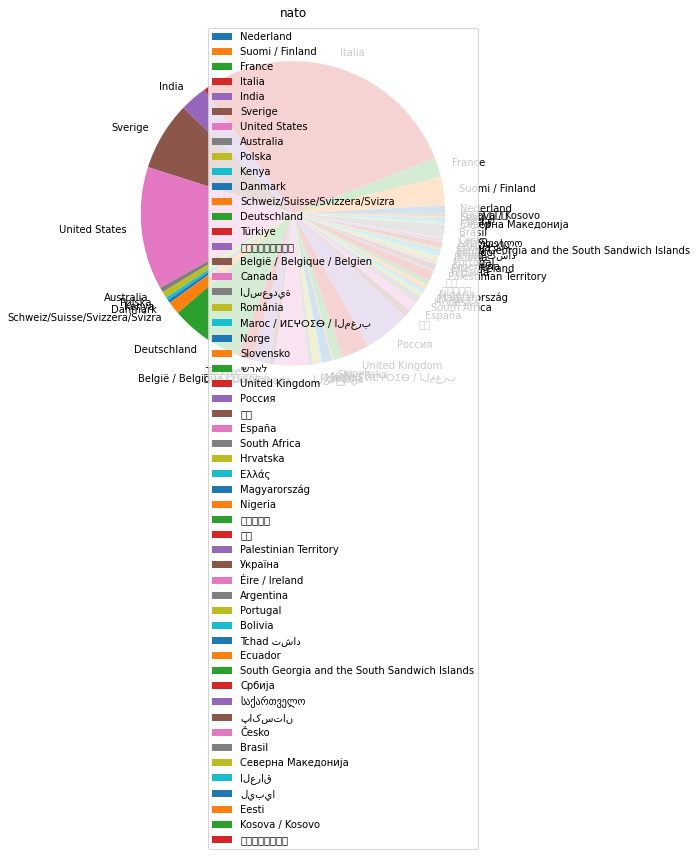

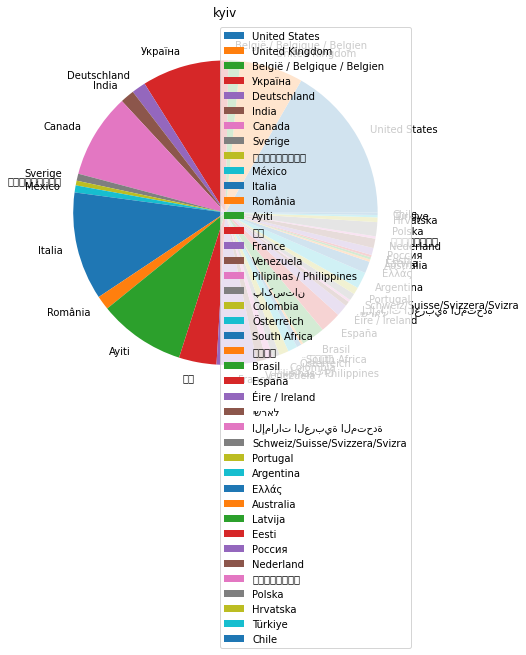

No handles with labels found to put in legend.


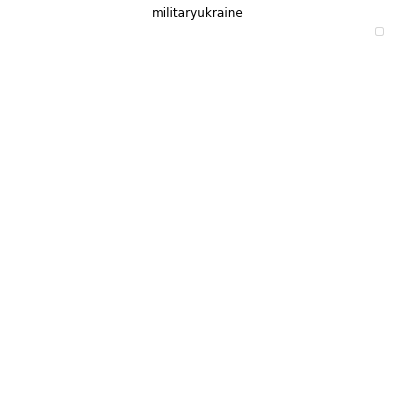

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 3521 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 3530 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 3515 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 3539 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 3517 missing from current font.

C:\Users\Benedikt\AppData\Local\Programs\Python\Python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarni

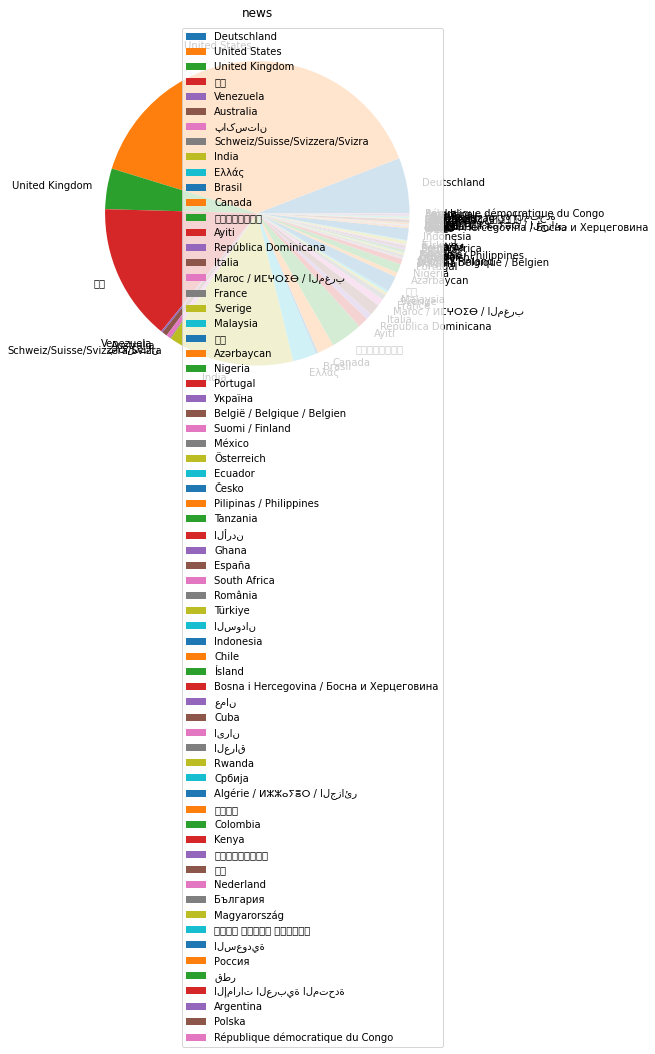

In [101]:
for key, value in dictOfhashtags_location.items():
    fig = plt.figure(figsize =(10, 7))
    plt.title(key)
    plt.pie(value.values(), labels = value.keys())
    plt.legend()
    plt.show()

3. Use other pie chart illustrations to show the language of the tweets for each of the above main hashtags.

In [102]:
dictOfhashtags_language = { i : {} for i in hashtags }

for index, row in tweets.iterrows():
    for hashtag in ast.literal_eval(row.loc['hashtags']):
        if hashtag.lower() in dictOfhashtags_language:
            if row.loc['language'] not in dictOfhashtags_language[hashtag.lower()].keys():
                dictOfhashtags_language[hashtag.lower()][row.loc['language']] = 1
            else:
                dictOfhashtags_language[hashtag.lower()][row.loc['language']] += 1

In [103]:
print(dictOfhashtags_language)

{'ukrainewar': {'und': 95, 'en': 567, 'it': 19, 'de': 32, 'ht': 4, 'fr': 34, 'ru': 22, 'uk': 8, 'es': 18, 'ja': 5, 'tr': 7, 'sv': 1, 'nl': 15, 'pt': 10, 'hi': 9, 'pl': 4, 'ml': 1, 'mr': 1, 'no': 1, 'kn': 1, 'in': 2, 'ko': 1, 'zh': 2, 'et': 1, 'ca': 2, 'or': 1, 'ar': 1, 'bn': 4, 'ta': 2, 'th': 1}, 'war': {'en': 586, 'pl': 30, 'und': 71, 'uk': 17, 'de': 10, 'ru': 29, 'es': 21, 'it': 45, 'fr': 10, 'tr': 12, 'hu': 1, 'ko': 1, 'pt': 17, 'sv': 2, 'nl': 2, 'ja': 12, 'ro': 2, 'hi': 1, 'tl': 1, 'el': 2, 'zh': 3, 'et': 1, 'te': 1, 'fi': 1, 'ar': 1, 'in': 1, 'mr': 1}, 'army': {'tr': 5, 'en': 266, 'ja': 65, 'und': 56, 'fr': 18, 'es': 122, 'pt': 14, 'it': 11, 'in': 15, 'ko': 6, 'ur': 4, 'no': 4, 'ru': 3, 'uk': 3, 'cy': 2, 'hi': 12, 'pl': 2, 'tl': 5, 'mr': 1, 'ta': 1, 'nl': 1, 'et': 4, 'th': 8, 'ca': 1, 'de': 2, 'vi': 1, 'te': 1, 'pa': 1, 'sd': 1, 'fa': 1, 'gu': 1}, 'military': {'en': 228, 'und': 19, 'it': 3, 'ja': 2, 'in': 2, 'tr': 2, 'de': 1, 'bn': 1, 'fr': 2, 'nl': 1, 'es': 1, 'hi': 2, 'uk': 1, '

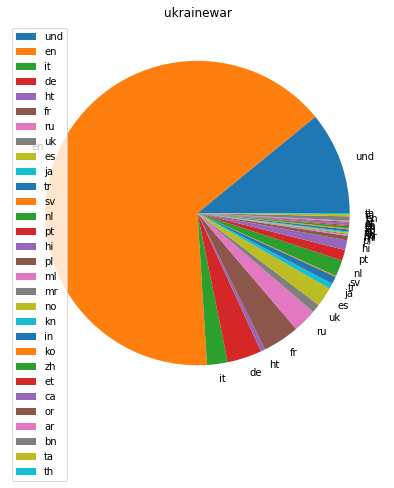

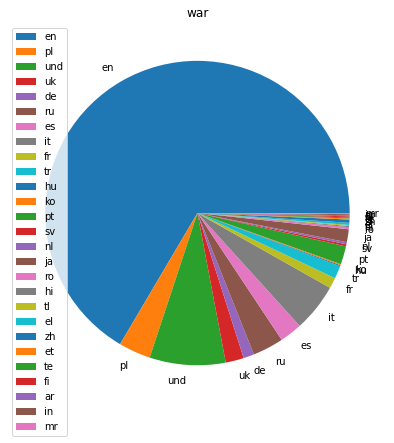

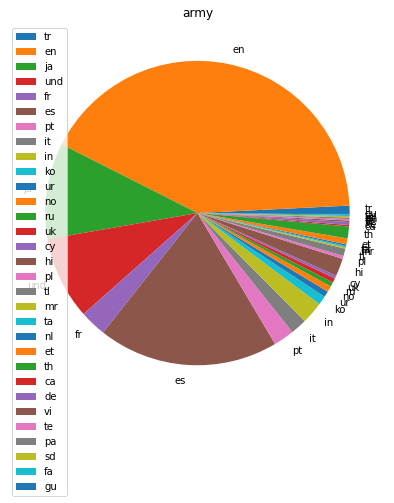

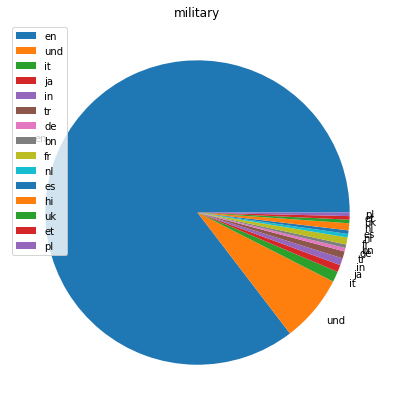

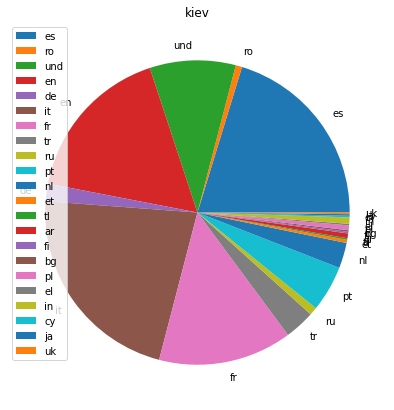

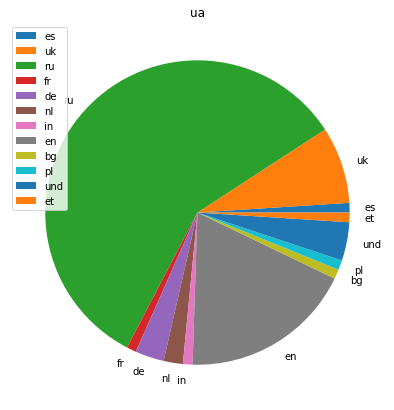

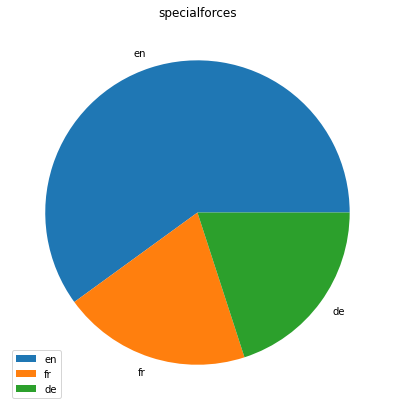

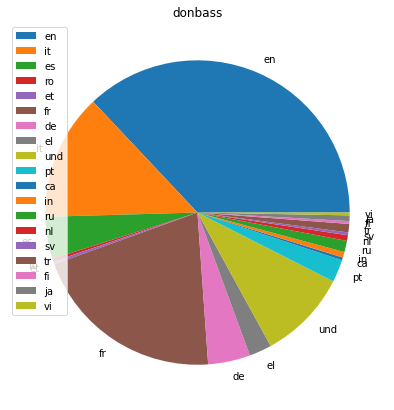

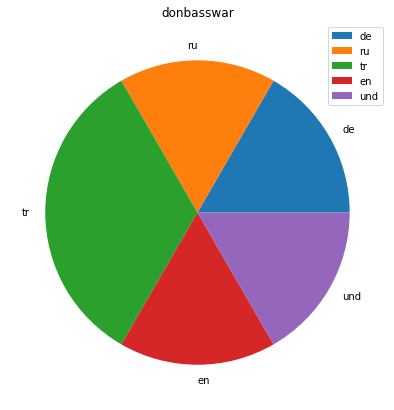

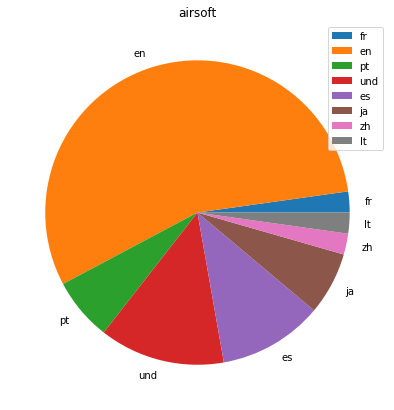

No handles with labels found to put in legend.


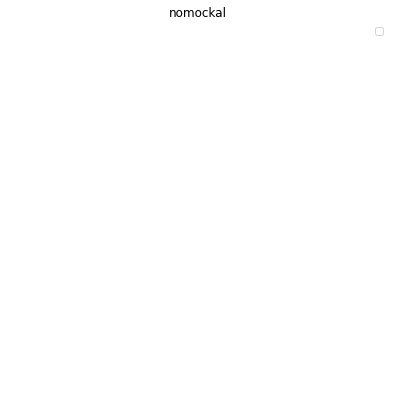

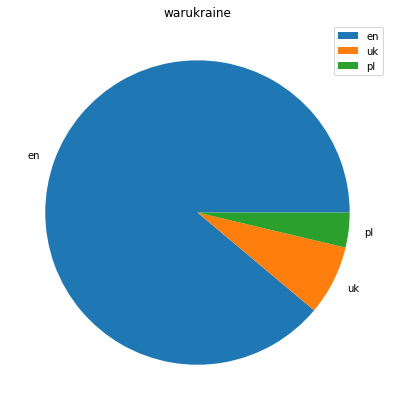

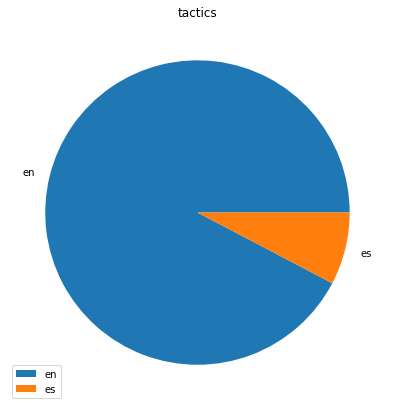

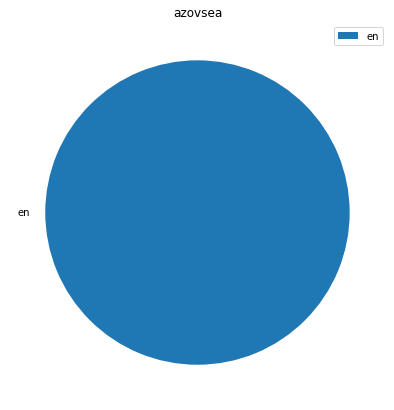

No handles with labels found to put in legend.


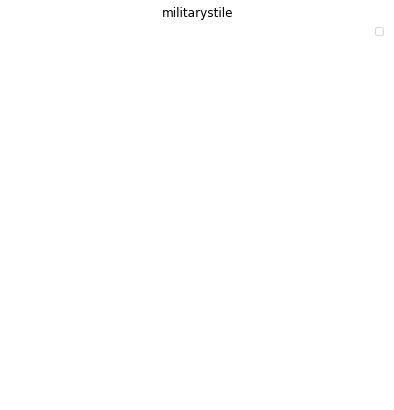

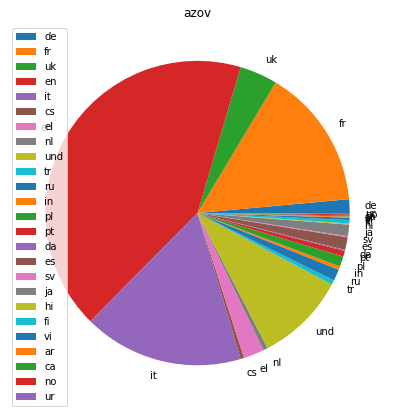

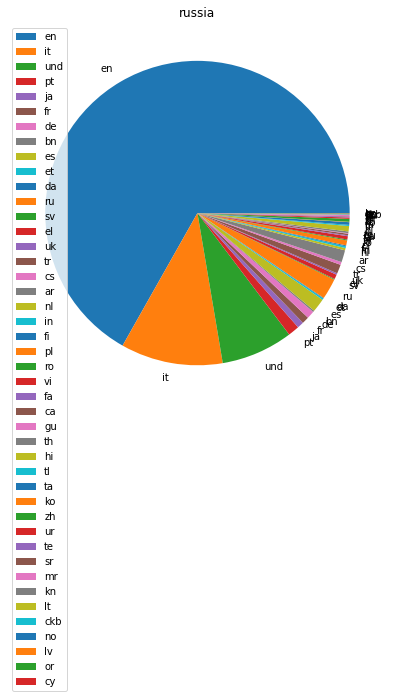

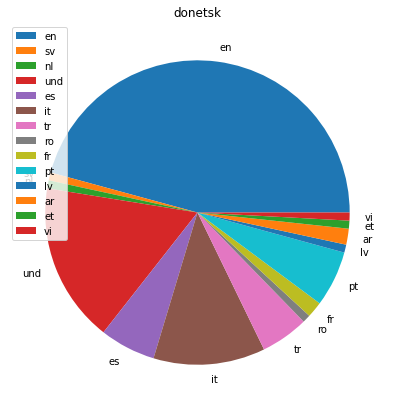

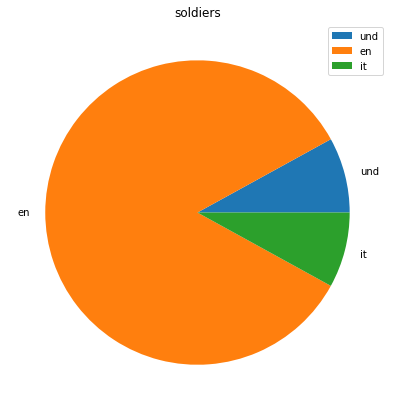

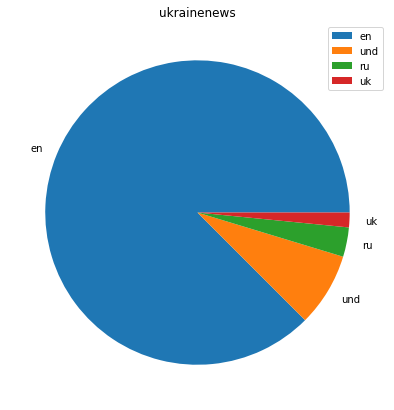

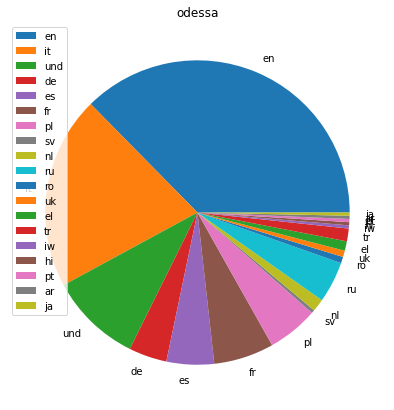

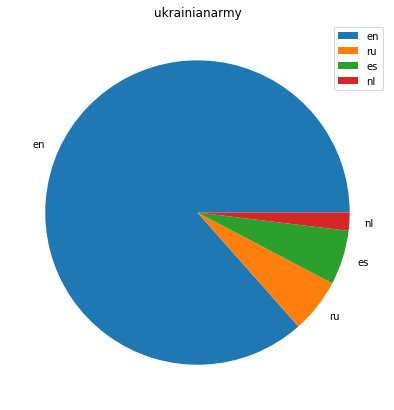

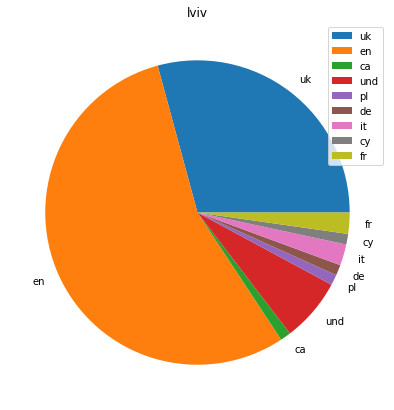

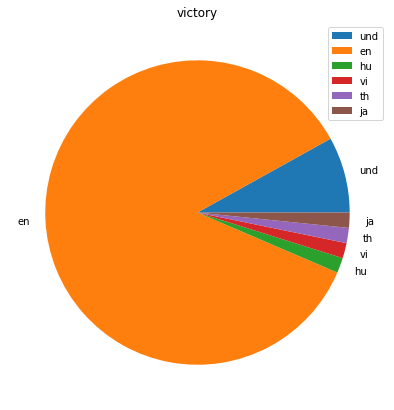

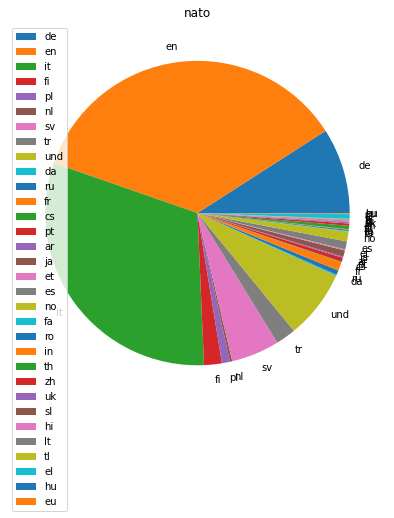

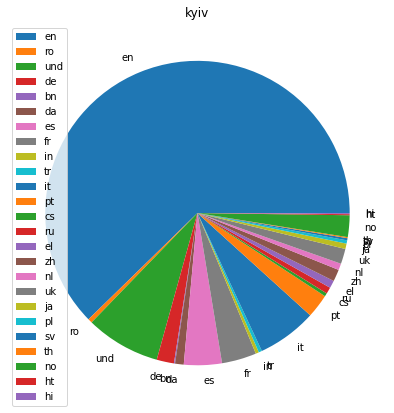

No handles with labels found to put in legend.


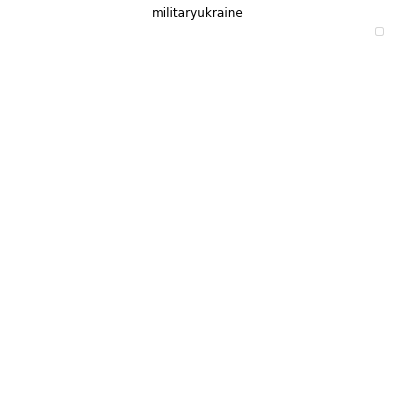

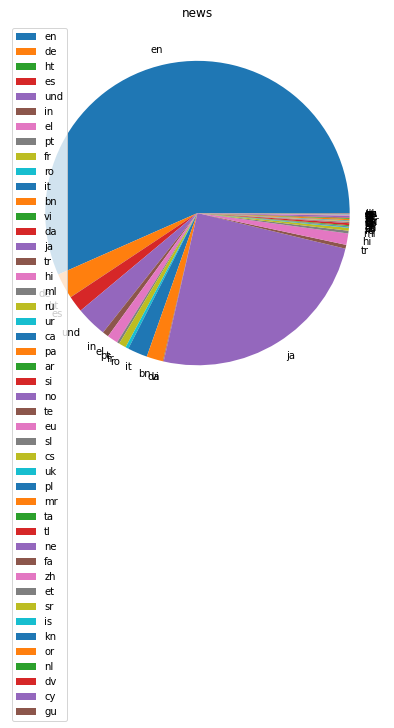

In [104]:
for key, value in dictOfhashtags_language.items():
    fig = plt.figure(figsize =(10, 7))
    plt.title(key)
    plt.pie(value.values(), labels = value.keys())
    plt.legend()
    plt.show()

4. Use VADER tool (https://github.com/cjhutto/vaderSentiment), which output sentiment in terms of POSITIVE, NEGATIVE and NEUTRAL to determine the sentiment of each tweet of the dataset. Then represent the sentiment of each tweet as a point in the ternary plot.

In [105]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentences = [text for text in tweets['text']]
analysis = []

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    analysis.append(analyzer.polarity_scores(sentence))

In [106]:
#print(sentences)

In [107]:
#print(analysis)

In [108]:
df_analysis = pd.DataFrame(analysis)
print(df_analysis)

         neg    neu    pos  compound
0      0.107  0.765  0.128    0.0314
1      0.000  0.633  0.367    0.9260
2      0.047  0.749  0.204    0.7777
3      0.050  0.872  0.078    0.2263
4      0.000  0.906  0.094    0.4588
...      ...    ...    ...       ...
19988  0.098  0.902  0.000   -0.5994
19989  0.000  1.000  0.000    0.0000
19990  0.000  1.000  0.000    0.0000
19991  0.000  0.856  0.144    0.4019
19992  0.000  1.000  0.000    0.0000

[19993 rows x 4 columns]


In [109]:
! pip install plotly

In [110]:
import plotly.express as px

df = pd.DataFrame({'neg':df_analysis['neg'], 'neu':df_analysis['neu'], 'pos':df_analysis['pos']})
fig = px.scatter_ternary(df, a="neg", b="neu", c="pos")
fig.show()